In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

### 1)Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)

In [2]:
# Read the file in to pandas dataframe and give names of the columns as no header line is present
colnames=['UserID','ProductID','Ratings','TimeStamp']
df=pd.read_csv("ratings_Electronics.csv", names=colnames, header=None)

In [3]:
df.head()

,UserID,ProductID,Ratings,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
# Dropping TimeStamp column as it makes no sense to include it.
df.drop(['TimeStamp'], axis=1,inplace=True)

In [5]:
# Dataframe after dropping TimeStamp column
df.head()

,UserID,ProductID,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


### Exploring given dataset

In [6]:
# check number of records in the dataset
print (f'Number of records in the dataset = {"{:,}".format(df.shape[0])}')

Number of records in the dataset = 7,824,482


In [7]:
# Check data types
df.dtypes 

UserID        object
ProductID     object
Ratings      float64
dtype: object

In [8]:
# Check for missing values
df.isnull().sum()

UserID       0
ProductID    0
Ratings      0
dtype: int64

In [9]:
# Check the number of unique Users in the dataset
print (f'Number of records in the dataset = {"{:,}".format(df.UserID.nunique())}')

Number of records in the dataset = 4,201,696


In [10]:
# Check the number of unique Products in the dataset
print (f'Number of records in the dataset = {"{:,}".format(df.ProductID.nunique())}')

Number of records in the dataset = 476,002


In [11]:
# Check number of unique rating values
print ('Unique values of Rating : ',df.Ratings.unique())

Unique values of Rating :  [5. 1. 3. 2. 4.]


### Univaritate Analysis : Ratings

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

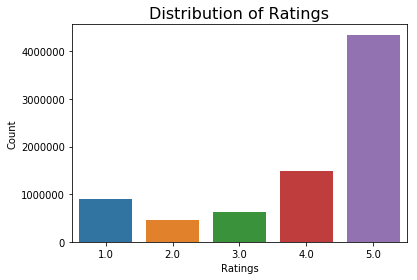

In [12]:
sns.countplot(df['Ratings'])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings', fontsize=16)

df['Ratings'].value_counts()

In [13]:
df['Ratings'].value_counts(normalize=True)

5.0    0.555633
4.0    0.189889
1.0    0.115249
3.0    0.080909
2.0    0.058320
Name: Ratings, dtype: float64

##### 55% of the products have recieved highest rating of '5', followed  by 19% with rating of '4'.

### Univariate analysis : User Ratings

* we shall calculate and check the distribution of a new feature "Number of products rated by each users"  to gain more insight

In [14]:
# calculate distribution of number of product rated by a user
rating_per_user=df.groupby('UserID').count().Ratings.sort_values(ascending=False)
rating_per_user.head()

UserID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Ratings, dtype: int64

C:\Users\veeresh\Anaconda3\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


Text(0.5, 1.0, 'Rating per user')

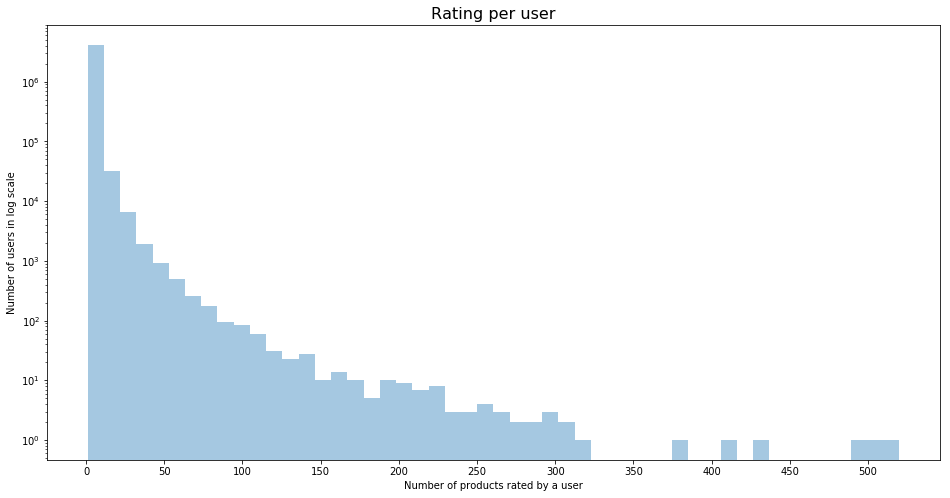

In [15]:
# Plot the number of product rated by a user
plt.figure(figsize=(16,8))
plt.yscale('log')
plt.xticks(np.arange(0,650,50))
sns.distplot(rating_per_user,kde=False)
plt.xlabel('Number of products rated by a user')
plt.ylabel('Number of users in log scale')
plt.title("Rating per user",fontsize=16)

In [16]:
rating_per_user.count()

4201696

In [17]:
rating_per_user[rating_per_user>30].count()/rating_per_user.count()*100

0.1155485784787857

* No of products rated by a customer are exponentially distributed
* Max number of product rated by a customer is  520
* Only ~0.1 % of the customer have rated geater than  30 products

### Univariate Analysis : Product ratings

* we shall calculate and check the distribution of a new feature "Number of ratings recieved by each product" to gain more insight

In [18]:
# calculate distribution of number of ratings for a product
ratings_per_product=df.groupby('ProductID').count().Ratings.sort_values(ascending=False)
ratings_per_product.head()

ProductID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Ratings, dtype: int64

C:\Users\veeresh\Anaconda3\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


Text(0.5, 1.0, 'Ratings per product')

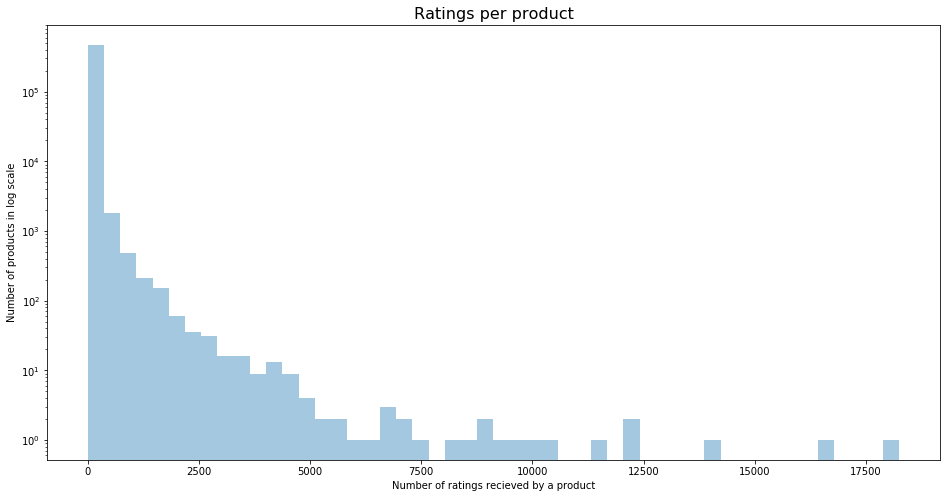

In [19]:
plt.figure(figsize=(16,8))
plt.yscale('log')
#plt.xticks(np.arange(0,500000,50000))
sns.distplot(ratings_per_product,kde=False)
plt.xlabel('Number of ratings recieved by a product')
plt.ylabel('Number of products in log scale')
plt.title("Ratings per product",fontsize=16)

In [20]:
ratings_per_product[ratings_per_product<25].count()

427828

In [21]:
ratings_per_product[ratings_per_product>1200].count()/ratings_per_product.count()*100

0.10525165860647645

* No of  rating recieved by a product are exponentially distributed
* Max number of product rated by a customer is  18244
* only 0.1 % of the product rated recieved ratings greater than 1200 

## 2)Take a subset of the dataset to make it less sparse/ denser

To reduce the dimensionality of the data set, and avoid running into “memory error”, we will filter out rarely rated products and rarely rating users.Cut off values are decided based on the EDA of user and product ratings

In [22]:
min_user_rating=30
min_product_rating=1200

In [ ]:
# derive a filter of user ids with ratings >30
user_filter=df.groupby('UserID').count().Ratings.sort_values(ascending=False)>=min_user_rating
user_filter=user_filter[user_filter].index.tolist()
user_filter

In [ ]:
print ('There are %d User Id greater than %d'%(len(user_filter),min_user_rating))

In [ ]:
# derive a filter of product ids with ratings >1200
product_filter=df.groupby('ProductID').count().Ratings.sort_values(ascending=False)>=min_product_rating
product_filter=product_filter[product_filter].index.tolist()
product_filter

In [ ]:
print ('There are %d product Id greater than %d'%(len(product_filter),min_product_rating))

In [ ]:
# Create a dense df using user and product filters
df_dense=df[(df['ProductID'].isin(product_filter)) & (df['UserID'].isin(user_filter))]
df_dense.head()

In [ ]:
# number of transaction in the dense df
print('There are %d records in the dense df'%(df_dense.shape[0]))

In [ ]:
# number of unqiue users in the dense df
print('There are %d unique users in dense df'%(df_dense.UserID.nunique()))

In [ ]:
# number of transaction in the spares df
print('There are %d unique products in dense df'%(df_dense.ProductID.nunique()))

### 3) Build Popularity Recommender model.

In [ ]:
# new data frame grouped by product id and  mean product rating as a column
df_dense_popular=pd.DataFrame(df_dense.groupby('ProductID').Ratings.mean())

In [ ]:
# add rating count as addittional column
df_dense_popular['rating_count']=pd.DataFrame(df_dense.groupby('ProductID').Ratings.count())

In [ ]:
# check the data frame
df_dense_popular.head()

In [ ]:
# we would like to consider 80% of the products for popularity based recommendation
print('cutoff value for number of ratings : %d'%(np.quantile(np.array(df_dense_popular.rating_count),.2)))

In [ ]:
min_votes = 20

In [ ]:
# calculate the dataset mean rating
mean_rating_dataset = np.mean(df_dense.Ratings.values)

In [ ]:
# calcuate weigthed ratings
def weighted_rating(df_dense_popular, min_votes, mean_rating_dataset):
    weighted_rating = list()
    V = df_dense_popular.rating_count.values
    R = df_dense_popular.Ratings.values
    for v, r in zip(V, R):
        if v < min_votes:
            weighted_rating.append(0)
        else:
            weighted_rating.append((v/(v+min_votes))*r + (min_votes/(v+min_votes))*mean_rating_dataset)
    return(weighted_rating)

In [ ]:
df_dense_popular['weighted_rating'] = weighted_rating(df_dense_popular, min_votes, mean_rating_dataset)

In [ ]:
# Top 5 recommended items based on popularity
print ('Top 5 recommended items based on popularity')
df_dense_popular.weighted_rating.sort_values(ascending=False).head(5)

### 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy
from collections import defaultdict
from surprise.model_selection import train_test_split
from surprise.similarities import pearson_baseline

In [ ]:
reader = Reader(rating_scale=(1, 5))

In [ ]:
# store data in to surprise dataframe as per format required
data = Dataset.load_from_df(df_dense[['UserID', 'ProductID', 'Ratings']], reader)

In [ ]:
# split intotrainset and test set
trainset,testset=train_test_split(data,test_size=0.30,random_state=0)

In [ ]:
# trainset based on user rating
trainset.ur

### 5) Build Collaborative Filtering model.

#### User based  collaborative filtering

In [ ]:
#initialize the model with minimum 50 neighbours
algo_user_filter = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
# Train the model
algo_user_filter.fit(trainset)

In [ ]:
# Query for specific predicions
UserID = str('A1660JZPHFX90N')  # raw user id
ProductID = str('B002V88HFE')  # raw item id

In [ ]:
# Prediction for specific users and items.
pred = algo_user_filter.predict(UserID, ProductID, verbose=True)

In [ ]:
# run the trained model against the testset
test_pred_user_filter = algo_user_filter.test(testset)

In [ ]:
# print trainset
test_pred_user_filter

In [ ]:
#covert prediction to dataframe

In [ ]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df_user = pd.DataFrame(test_pred_user_filter, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_user['Iu'] = df_user.uid.apply(get_Iu)
df_user['Ui'] = df_user.iid.apply(get_Ui)
df_user['err'] = abs(df_user.est - df_user.rui)

In [ ]:
df_user.head()

### Evaluate the above model.

In [ ]:
# get RMSE
print("User-User based Model : Test Set")
print('RMSE : ',accuracy.rmse(test_pred_user_filter, verbose=False))


In [ ]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# Top five prediction for each user
get_top_n(test_pred_user_filter,5)

In [ ]:
j=24
predict_top5_user_filter=get_top_n(test_pred_user_filter,5)
print('Sample prediction for User filter\n')
print('UserId : ',list(predict_top5_user_filter.items())[j][0])
print('\nTop 5 product recomemdations :\n\n(Produt ID    : Predicted rating)' )
for i in np.arange(0,5):
    print(list(predict_top5_user_filter.items())[j][1][i])

### Item based collaborative filtering

In the present dense df the number of user is 4 times higher than number of products and hence item-based filtering is likely to be faster and more stable than user-based. It is effective because usually, the average rating received by an item doesn’t change as quickly as the average rating given by a user to different items.
In the present case we shall not adjsut for the user bias rating for the above reasoning and assume that the user bias doesnot affect the rating  mean product rating significantly.

In [ ]:
#initialize the model with minimum 50 neighbours
algo_item_filter = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
# Train the model
algo_item_filter.fit(trainset)

In [ ]:
# Query for specific predicions
UserID = str('A1660JZPHFX90N')  # raw user id
ProductID = str('B002V88HFE')  # raw item id

In [ ]:
# Prediction for specific users and items.
pred = algo_item_filter.predict(UserID, ProductID, verbose=True)

In [ ]:
# run the trained model against the testset
test_pred_item_filter = algo_item_filter.test(testset)

In [ ]:
# print trainset
test_pred_item_filter

In [ ]:
#convert the prediction to data frame

In [ ]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df_item = pd.DataFrame(test_pred_item_filter, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_item['Iu'] = df_item.uid.apply(get_Iu)
df_item['Ui'] = df_item.iid.apply(get_Ui)
df_item['err'] = abs(df_item.est - df_item.rui)

In [ ]:
df_item.head()

In [ ]:
# get RMSE
print("User-User based Model : Test Set")
print('RMSE : ',accuracy.rmse(test_pred_item_filter, verbose=False))

In [ ]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# Top five prediction for each user
get_top_n(test_pred_item_filter,5)

In [ ]:
predict_top5_item_filter=get_top_n(test_pred_item_filter,5)
print('Sample prediction based on item item filter\n')
print('UserId : ',list(predict_top5_item_filter.items())[24][0])
print('\nTop 5 product recomemdations :\n\n(Produt ID    : Predicted rating)' )
for i in np.arange(0,5):
    print(list(predict_top5_item_filter.items())[24][1][i])

### SVD() 

In [ ]:
#Initialize the algo and fit trainset
algo_SVD = SVD()
algo_SVD.fit(trainset)

In [ ]:
# prediction for based on trained model
predictions_SVD = algo_SVD.test(testset)

In [ ]:
# print the prediction for the users
predictions_SVD

In [ ]:
# conver the prediction to dataframe

In [ ]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df_SVD = pd.DataFrame(predictions_SVD, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_SVD['Iu'] = df_SVD.uid.apply(get_Iu)
df_SVD['Ui'] = df_SVD.iid.apply(get_Ui)
df_SVD['err'] = abs(df_SVD.est - df_SVD.rui)

In [ ]:
df_SVD.head()

In [ ]:
# Evalaute the model and get RMSE
print("SVD Model : Test Set")
print ('RMSE : ',accuracy.rmse(predictions_SVD, verbose=False))

In [ ]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
predict_top5_SVD=get_top_n(predictions_SVD,5)

In [ ]:
predict_top5_SVD

In [ ]:
j=1
print('Sample prediction based on SVD\n')
print('UserId : ',list(predict_top5_SVD.items())[j][0])
print('\nTop 5 product recomemdations :\n\n(Produt ID    : Predicted rating)' )
for i in np.arange(0,5):
    print(list(predict_top5_SVD.items())[j][1][i])

### 8. Summarize and  insights.

### Comparision of models

In [ ]:
# Comparison of rmse error for different models

In [ ]:
model_eval_summary=pd.DataFrame(columns=['rmse error'],index=['Colaborative_user_filter','Colaborative_item_filter','SVD'],data=np.array([accuracy.rmse(test_pred_user_filter, verbose=False),accuracy.rmse(test_pred_item_filter, verbose=False),accuracy.rmse(predictions_SVD, verbose=False)]))
print(model_eval_summary)
sns.set()
plt.bar(x=model_eval_summary.index,height=model_eval_summary['rmse error'])
plt.title('Model error comparision',fontsize=16)
plt.ylabel('rmse error')
plt.xticks(rotation=90)

* SVD model perform best as a recomender system with lowest rmse
* Item base filtering performs better than user based filtering for rmse even though the users bais is not corrected.This is due to higher number of users as compared to products (4 times) in the data base ( the average rating received by an item doesn’t change as quickly as the average rating given by a user to different items)

In [ ]:
#Comparison of recomendation of a sample customer

In [ ]:
j=1
predict_top5=get_top_n(test_pred_user_filter,5)
print('UserId : ',list(predict_top5_user_filter.items())[j][0])
print('\nTop 5 product recomemdations')
print('\nSample prediction for User colaborative filter\n')

print('(Produt ID    : Predicted rating)' )
for i in np.arange(0,5):
    print(list(predict_top5_user_filter.items())[j][1][i])

print('\nSample prediction based on item item colaborative filter\n')
print('(Produt ID    : Predicted rating)' )
for i in np.arange(0,5):
    print(list(predict_top5_item_filter.items())[j][1][i])

print('\nSample prediction based on SVD\n')

print('(Produt ID    : Predicted rating)' )
for i in np.arange(0,5):
    print(list(predict_top5_SVD.items())[j][1][i])

The top 5 recommendation given by the 3 algorithms used are the same however the order doesnot match, 
There is a considerable difference in the predicted rating and this can have a significant effect on the recommendation in case a minimum cutoff rating filter is also applied.